# BBM469 Data Intensive Applications Lab.
# Clustering and Classification with Python



#### Student name : Zafer Can YUCEL



## Table of Content

[Purpose](#purpose)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling for Clustering](#clusteringmodel)  
[Clustering results](#clustering)    
[Modeling for Classification](#classificationmodel)  
[References](#references)   


## Purpose <a class="anchor" id="purpose"></a>

This assignment aims to try to find out how we can detect haricot bean species, using machine learning methods from the features created by digitizing the images of the various haricot beans. We need to analyze the data, find missing or null values and make feature selection.We need to apply clustering and classification methods on this dataset.

## Data Understanding<a class="anchor" id="data_understanding"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")


In [2]:
df_original_data = pd.read_csv('data.csv')
df_original_data.shape


(13611, 17)

In [3]:
df_original_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


 - This dataset consists of 13611 samples containing 16 features. The "Class" column shows the class to which the rows belong.

In [4]:
df_original_data.describe(include ='all')

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DERMASON
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3546
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063,NaN
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366,NaN
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,NaN
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703,NaN
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386,NaN
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883,NaN


In [5]:
# checking data types of features
df_original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

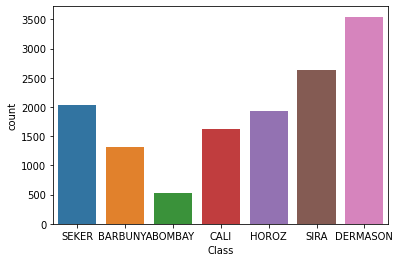

In [6]:
# Class distribution of dataset.
ax = sns.countplot(df_original_data['Class'], label="Count")

## Data Preparation<a class="anchor" id="data_preparation"></a>

In [7]:
df_original_data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

- There is no null value or missing value in the dataset.
- Since the "Class" feature is of string type, we convert this feature to integer type with labelencoder.

In [8]:
labelencoder = LabelEncoder()
df_original_data['Class'] = labelencoder.fit_transform(df_original_data['Class'])
class_names = labelencoder.classes_
original_data_X = df_original_data.iloc[:,0:16]
original_data_Y = df_original_data.Class


<AxesSubplot:>

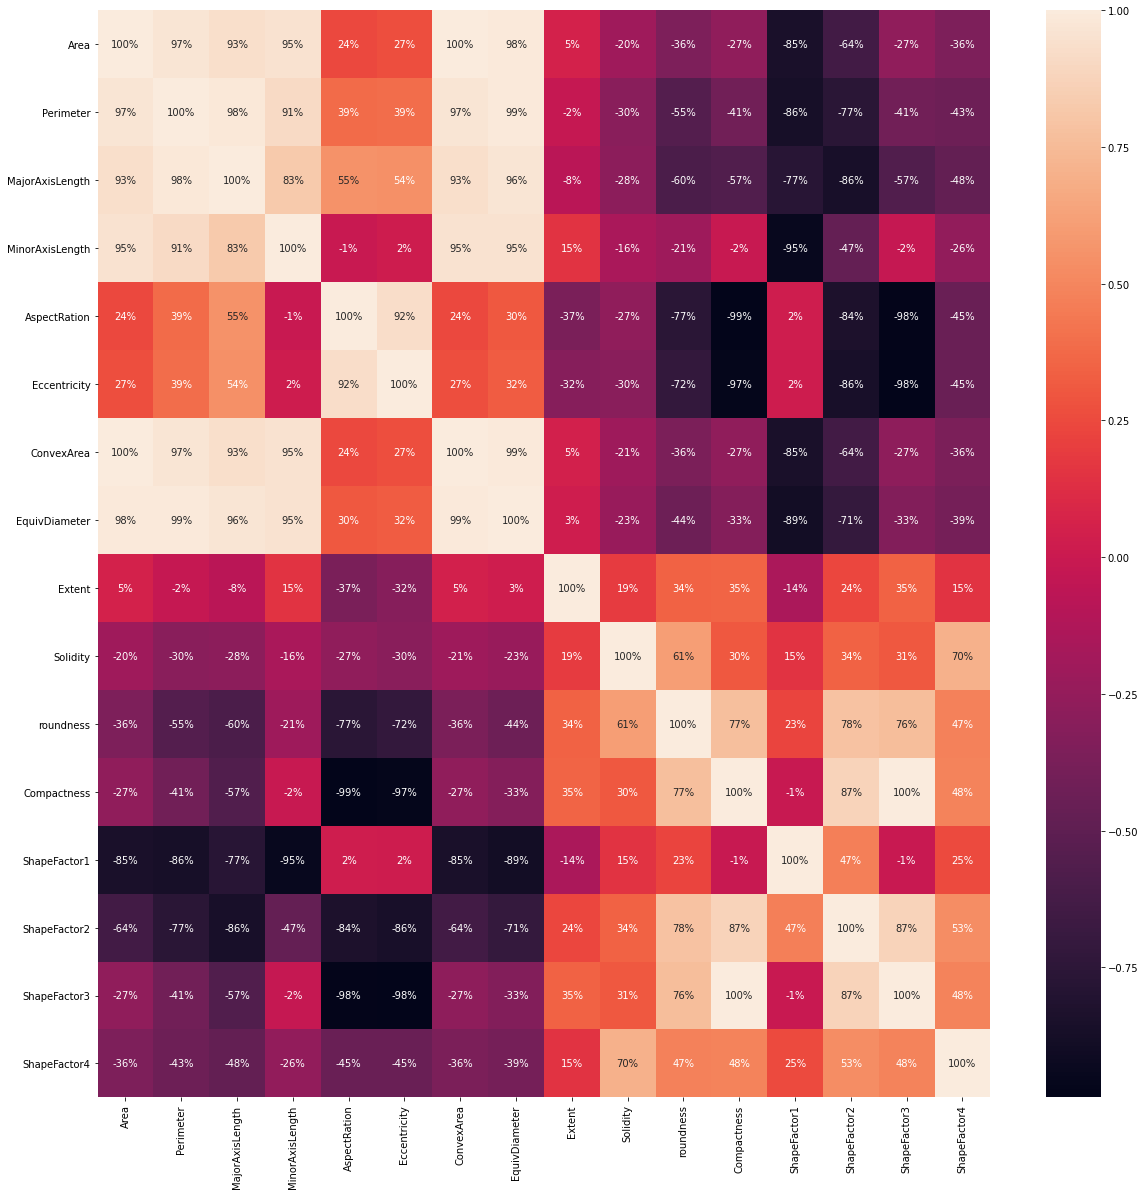

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(original_data_X.corr(), annot=True, fmt='.0%')

- This plot is the correlation map of the dataset. Correlation map shows how features correlated with each other. <br>
When we look at this correlation map, it is seen that the correlation between 'Area','Perimeter' 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter' features is high. Therefore, we select only one of these features and remove the others from the dataframe. <br> I dropped [ 'Perimeter' 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter' ] features

In [10]:
features_to_delete = ['Perimeter','MajorAxisLength','MinorAxisLength', 'ConvexArea', 'EquivDiameter']
X_feature_selection = original_data_X.drop(features_to_delete, axis =1)
Y_feature_selection = original_data_Y
X_feature_selection.head()

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,1.197191,0.549812,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,1.097356,0.411785,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,1.209713,0.562727,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,1.153638,0.498616,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,1.060798,0.333680,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [11]:
# Normalize
scaler = MinMaxScaler()
df_normalized_X = pd.DataFrame(scaler.fit_transform(X_feature_selection), columns = X_feature_selection.columns)
df_normalized_X.head()

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.034053,0.122612,0.477797,0.671024,0.922824,0.934823,0.786733,0.593432,0.833049,0.750996,0.980620
1,0.035500,0.051577,0.278472,0.735504,0.871514,0.793138,0.903549,0.547447,0.967316,0.884987,0.974979
2,0.038259,0.131521,0.496448,0.716671,0.932141,0.914511,0.773514,0.582016,0.800942,0.736200,0.987196
3,0.040940,0.091623,0.403864,0.731365,0.761614,0.826871,0.829912,0.552408,0.854744,0.799846,0.893675
4,0.041504,0.025565,0.165680,0.700538,0.949832,0.988408,0.951583,0.510741,1.000000,0.941770,0.989116


We apply min-max normalization to our data. 

<font size="5">$𝑥' = \frac{𝑥−𝑚𝑖𝑛(𝑥)}{𝑚𝑎𝑥(𝑥) −𝑚𝑖𝑛(𝑥)}$</font>

## Modeling for Clustering <a class="anchor" id="clusteringmodel"></a>

- In the clustering part, we will use Kmeans Clustering Algorithm. <br>
Since we have 7 class, We use the n_cluster parameter as 7.


In [12]:
# for Original Data
kmeans_selection = KMeans(n_clusters=7).fit(X_feature_selection)
clusters_selection = kmeans_selection.predict(X_feature_selection)

In [13]:
# for Normalized Data
kmeans_normalized_selection = KMeans(n_clusters=7).fit(df_normalized_X)
clusters_normalized_selection = kmeans_normalized_selection.predict(df_normalized_X)

We have applied the kmeans clustering method for both the original dataset and the normalized dataset.

In [14]:
# adds the clustering results to the dataframe.
X_feature_selection.insert(11, 'Cluster_Prediction', clusters_selection)
df_normalized_X.insert(11, 'Cluster_Prediction_Normalized', clusters_normalized_selection)

## Clustering results<a class="anchor" id="clustering"></a>

- We select two features to show our cluster results. We plot the results for both the original dataset and the normalized dataset. The features we have chosen are 'Area' and 'ShapeFactor3'.

Text(0.5, 1.0, 'Predicted(Normalized Dataset)')

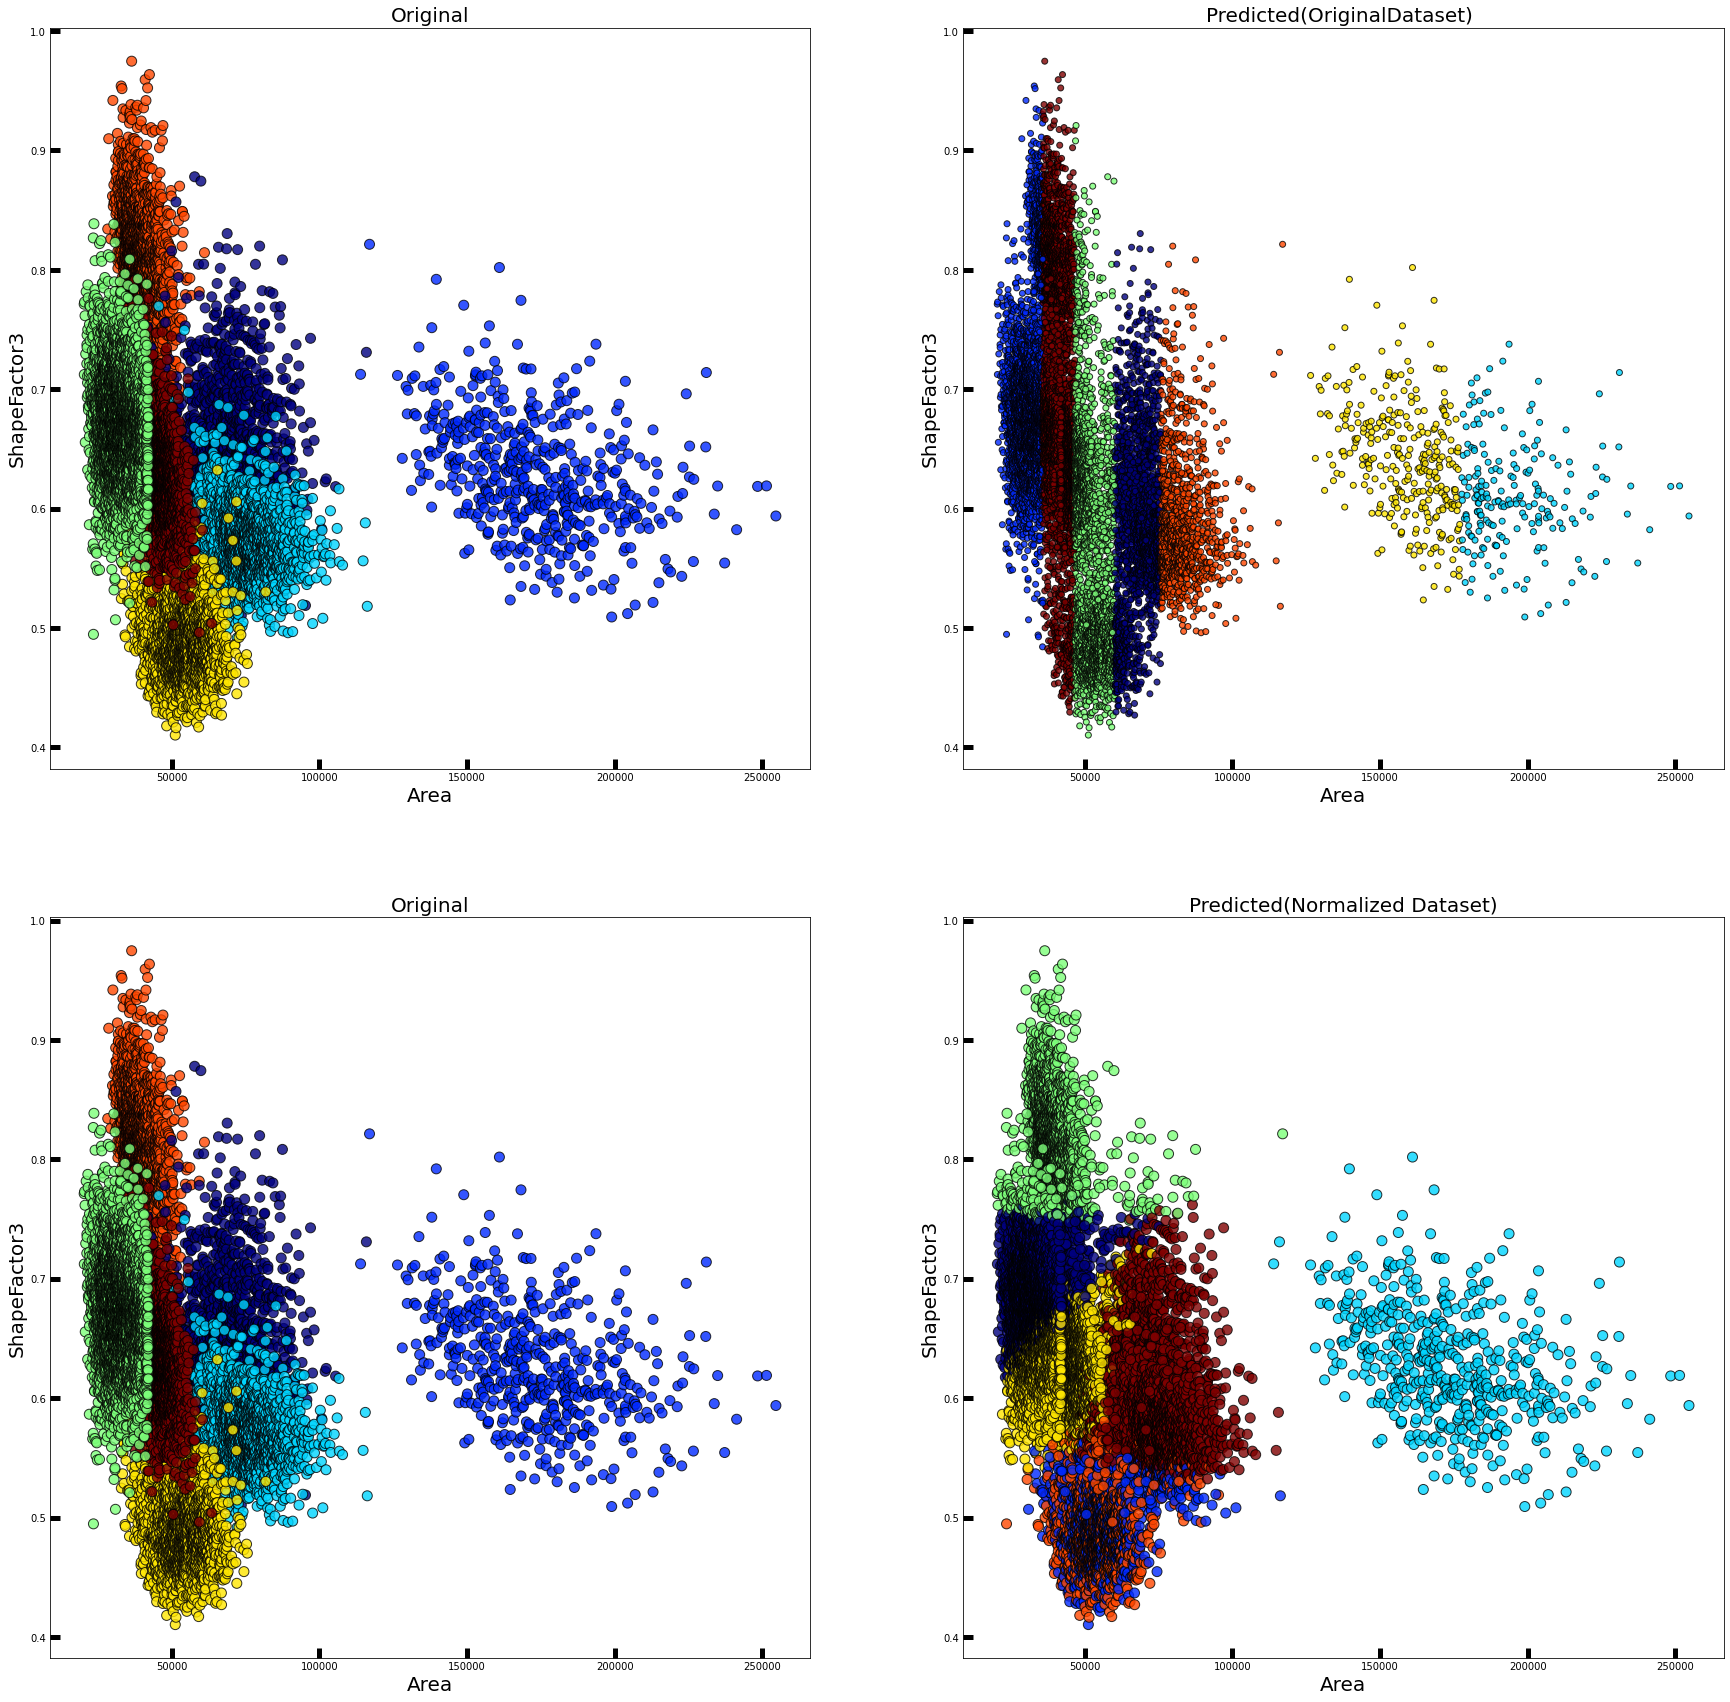

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(30,30))
axes[0][0].scatter(X_feature_selection['Area'], X_feature_selection['ShapeFactor3'], c=df_original_data['Class'], cmap='jet', edgecolor='black', alpha = 0.8, s=100)
axes[0][1].scatter(X_feature_selection['Area'], X_feature_selection['ShapeFactor3'], c=X_feature_selection['Cluster_Prediction'], cmap='jet', edgecolor='black', alpha = 0.8)
axes[0][0].set_xlabel('Area', fontsize=20)
axes[0][0].set_ylabel('ShapeFactor3', fontsize=20)
axes[0][1].set_xlabel('Area', fontsize=20)
axes[0][1].set_ylabel('ShapeFactor3', fontsize=20)
axes[0][0].tick_params(direction='in', length=10, width=5, colors='k')
axes[0][1].tick_params(direction='in', length=10, width=5, colors='k')
axes[0][0].set_title('Original', fontsize=20)
axes[0][1].set_title('Predicted(OriginalDataset) ', fontsize=20)


axes[1][0].scatter(original_data_X['Area'], original_data_X['ShapeFactor3'], c=df_original_data['Class'], cmap='jet', edgecolor='black', alpha = 0.8, s=100)
axes[1][1].scatter(original_data_X['Area'], original_data_X['ShapeFactor3'], c=df_normalized_X['Cluster_Prediction_Normalized'], cmap='jet', edgecolor='black', alpha = 0.8, s=100)
axes[1][0].set_xlabel('Area', fontsize=20)
axes[1][0].set_ylabel('ShapeFactor3', fontsize=20)
axes[1][1].set_xlabel('Area', fontsize=20)
axes[1][1].set_ylabel('ShapeFactor3', fontsize=20)
axes[1][0].tick_params(direction='in', length=10, width=5, colors='k')
axes[1][1].tick_params(direction='in', length=10, width=5, colors='k')
axes[1][0].set_title('Original', fontsize=20)
axes[1][1].set_title('Predicted(Normalized Dataset)', fontsize=20)

-When we look at the results, it seems that the normalized dataset give better results than the original dataset. <br>
Clustering methods are used in unsupervised learning. Since we know the target labels in this dataset, we can get more accurate results in supervised learning methods such as KNN, SVM, Logistic Regression, Random Forest Classifier etc.


## Modeling for Classification <a class="anchor" id="classificationmodel"></a>

# <h2> Dataset Split </h2>

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_feature_selection, original_data_Y, test_size=0.2, random_state=42) 
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(X_feature_selection, original_data_Y , test_size=0.2, random_state=42) 

X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train_normalized), columns=X_train_normalized.columns)
X_test_normalized = pd.DataFrame(scaler.transform(X_test_normalized), columns=X_test_normalized.columns)

I split the data into 80% train and 20% test. After splitting I applied min max normalization.

I will apply K Nearest Neighbors, Support Vector Machine, Random Forest, Decision Tree, Naïve Bayes, Logistic Regression  classification methods one by one and compare the results. 

In [17]:
original_dataset_accuracy = []
normalized_dataset_accuracy = []

Evaluate your model. Provide results, tables, charts, etc.

<h3> K Nearest Neighbors </h3>

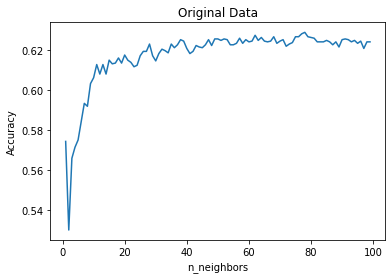

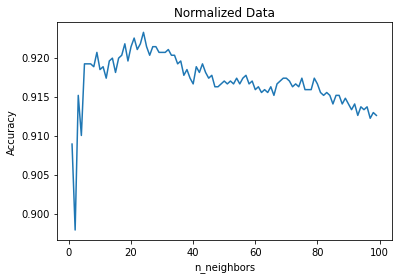

In [18]:
score_original =[]
for i in range (1,100):
    knn= KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    score_original.append(knn.score(X_test, y_test))

plt.plot(range(1,100),score_original)
plt.title("Original Data")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.show()
best_knn =score_original.index(max(score_original))

score_normalized =[]
for i in range (1,100):
    knn_normalized= KNeighborsClassifier(n_neighbors = i)
    knn_normalized.fit(X_train_normalized,y_train)
    score_normalized.append(knn_normalized.score(X_test_normalized, y_test))
    
plt.plot(range(1,100),score_normalized)
plt.title("Normalized Data")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")

plt.show()
best_knn_normalized =score_normalized.index(max(score_normalized))

The best n_neighbor value for the original data is 77 and the best n_neighbor value for the normalized data is 23.

In [19]:
knn= KNeighborsClassifier(n_neighbors = best_knn)
knn.fit(X_train,y_train)

knn_normalized= KNeighborsClassifier(n_neighbors = best_knn_normalized)
knn_normalized.fit(X_train_normalized,y_train)

acc = accuracy_score(y_test, knn.predict(X_test))
original_dataset_accuracy.append(acc)
acc = accuracy_score(y_test, knn_normalized.predict(X_test_normalized))
normalized_dataset_accuracy.append(acc)

<h4> Results of KNN </h4>

In [20]:
print("Original dataset with Knn model\n")
print(classification_report(y_test, knn.predict(X_test))) 

Original dataset with Knn model

              precision    recall  f1-score   support

           0       0.43      0.18      0.26       261
           1       1.00      1.00      1.00       117
           2       0.60      0.80      0.69       317
           3       0.73      0.83      0.78       671
           4       0.63      0.58      0.60       408
           5       0.42      0.25      0.31       413
           6       0.57      0.74      0.64       536

    accuracy                           0.63      2723
   macro avg       0.63      0.63      0.61      2723
weighted avg       0.61      0.63      0.60      2723



In [21]:
print("Normalized dataset with Knn model\n")
print(classification_report(y_test, knn_normalized.predict(X_test_normalized)))

Normalized dataset with Knn model

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       261
           1       1.00      1.00      1.00       117
           2       0.91      0.96      0.93       317
           3       0.90      0.92      0.91       671
           4       0.97      0.94      0.96       408
           5       0.97      0.94      0.96       413
           6       0.85      0.90      0.87       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



<h4> Confusion Matrix of KNN </h4>

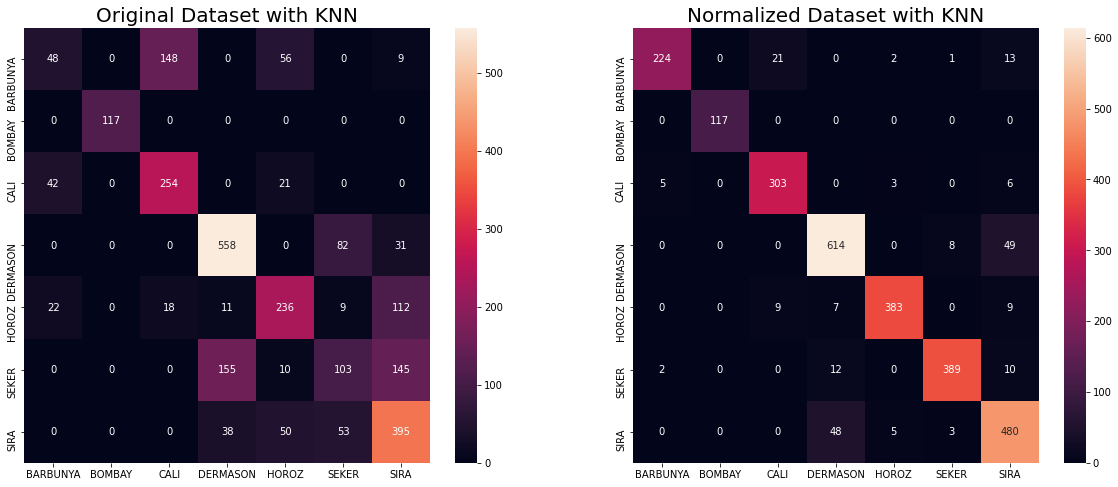

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

axes[0].set_title('Original Dataset with KNN',fontsize=20)
cm3 = confusion_matrix(y_test, knn.predict(X_test))
sns.heatmap(cm3, annot=True, fmt='g', ax=axes[0])
axes[0].xaxis.set_ticklabels(class_names); axes[0].yaxis.set_ticklabels(class_names);

axes[1].set_title('Normalized Dataset with KNN',fontsize=20)
cm4 = confusion_matrix(y_test, knn_normalized.predict(X_test_normalized))
sns.heatmap(cm4, annot=True, fmt='g', ax=axes[1])
axes[1].xaxis.set_ticklabels(class_names); axes[1].yaxis.set_ticklabels(class_names);

<h3> Support Vector Machine </h3>

In [23]:
svm = SVC(random_state=1)
svm.fit(X_train,y_train)
print("Original dataset with SVM model\n")
print(classification_report(y_test, svm.predict(X_test)))

Original dataset with SVM model

              precision    recall  f1-score   support

           0       0.46      0.09      0.15       261
           1       1.00      1.00      1.00       117
           2       0.60      0.89      0.72       317
           3       0.75      0.83      0.78       671
           4       0.63      0.58      0.60       408
           5       0.40      0.26      0.32       413
           6       0.57      0.74      0.64       536

    accuracy                           0.63      2723
   macro avg       0.63      0.63      0.60      2723
weighted avg       0.61      0.63      0.60      2723



In [24]:
svm_normalized = SVC(random_state=1)
svm_normalized.fit(X_train_normalized,y_train)
print("Normalized dataset with SVM model\n")
print(classification_report(y_test, svm_normalized.predict(X_test_normalized))) 

Normalized dataset with SVM model

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       261
           1       1.00      1.00      1.00       117
           2       0.93      0.95      0.94       317
           3       0.91      0.92      0.91       671
           4       0.98      0.95      0.97       408
           5       0.97      0.94      0.95       413
           6       0.85      0.90      0.88       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [25]:
acc = accuracy_score(y_test, svm.predict(X_test))
original_dataset_accuracy.append(acc)
acc = accuracy_score(y_test, svm_normalized.predict(X_test_normalized))
normalized_dataset_accuracy.append(acc)

<h4> Confusion Matrix of SVM </h4>

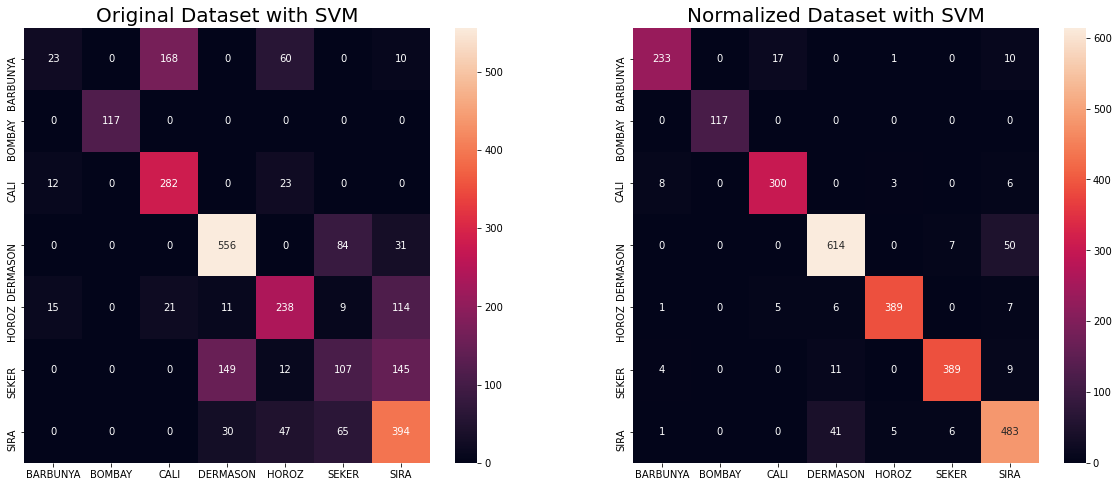

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

axes[0].set_title('Original Dataset with SVM',fontsize=20)
cm3 = confusion_matrix(y_test, svm.predict(X_test))
sns.heatmap(cm3, annot=True, fmt='g', ax=axes[0])
axes[0].xaxis.set_ticklabels(class_names); axes[0].yaxis.set_ticklabels(class_names);

axes[1].set_title('Normalized Dataset with SVM',fontsize=20)
cm4 = confusion_matrix(y_test, svm_normalized.predict(X_test_normalized))
sns.heatmap(cm4, annot=True, fmt='g', ax=axes[1])
axes[1].xaxis.set_ticklabels(class_names); axes[1].yaxis.set_ticklabels(class_names);

<h3> Random Forest </h3>

In [27]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train,y_train)
print("Original dataset with Random Forest model\n")
print(classification_report(y_test, rf.predict(X_test))) 

Original dataset with Random Forest model

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       261
           1       1.00      1.00      1.00       117
           2       0.92      0.94      0.93       317
           3       0.90      0.92      0.91       671
           4       0.97      0.95      0.96       408
           5       0.96      0.94      0.95       413
           6       0.87      0.88      0.87       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



In [28]:
rf_normalized = RandomForestClassifier(n_estimators=100, random_state=1)
rf_normalized.fit(X_train_normalized,y_train)
print("Normalized dataset with Random Forest model\n")
print(classification_report(y_test, rf_normalized.predict(X_test_normalized))) 

Normalized dataset with Random Forest model

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       261
           1       1.00      1.00      1.00       117
           2       0.92      0.94      0.93       317
           3       0.91      0.92      0.91       671
           4       0.97      0.96      0.96       408
           5       0.97      0.94      0.95       413
           6       0.87      0.89      0.88       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [29]:
acc = accuracy_score(y_test, rf.predict(X_test))
original_dataset_accuracy.append(acc)
acc = accuracy_score(y_test, rf_normalized.predict(X_test_normalized))
normalized_dataset_accuracy.append(acc)

<h4> Confusion Matrix of Random Forest </h4>

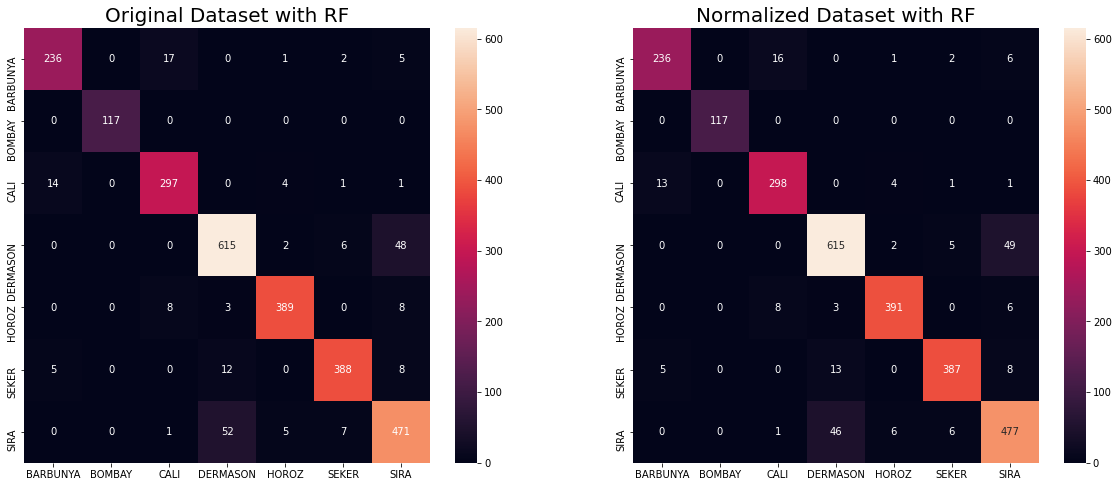

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

axes[0].set_title('Original Dataset with RF',fontsize=20)
cm3 = confusion_matrix(y_test, rf.predict(X_test))
sns.heatmap(cm3, annot=True, fmt='g', ax=axes[0])
axes[0].xaxis.set_ticklabels(class_names); axes[0].yaxis.set_ticklabels(class_names);

axes[1].set_title('Normalized Dataset with RF',fontsize=20)
cm4 = confusion_matrix(y_test, rf_normalized.predict(X_test_normalized))
sns.heatmap(cm4, annot=True, fmt='g', ax=axes[1])
axes[1].xaxis.set_ticklabels(class_names); axes[1].yaxis.set_ticklabels(class_names);

<h3> Decision Tree </h3>

In [31]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Original dataset with Decision Tree\n")
print(classification_report(y_test, dt.predict(X_test))) 

Original dataset with Decision Tree

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       261
           1       1.00      1.00      1.00       117
           2       0.87      0.91      0.89       317
           3       0.89      0.87      0.88       671
           4       0.95      0.92      0.94       408
           5       0.94      0.92      0.93       413
           6       0.81      0.85      0.83       536

    accuracy                           0.89      2723
   macro avg       0.90      0.90      0.90      2723
weighted avg       0.89      0.89      0.89      2723



In [32]:
dt_normalized = DecisionTreeClassifier()
dt_normalized.fit(X_train_normalized,y_train)
print("Normalized dataset with Decision Tree\n")
print(classification_report(y_test, dt_normalized.predict(X_test_normalized))) 

Normalized dataset with Decision Tree

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       261
           1       1.00      1.00      1.00       117
           2       0.89      0.89      0.89       317
           3       0.89      0.87      0.88       671
           4       0.93      0.93      0.93       408
           5       0.94      0.91      0.92       413
           6       0.81      0.86      0.83       536

    accuracy                           0.89      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.89      0.89      0.89      2723



In [33]:
acc = accuracy_score(y_test, dt.predict(X_test))
original_dataset_accuracy.append(acc)
acc = accuracy_score(y_test, dt_normalized.predict(X_test_normalized))
normalized_dataset_accuracy.append(acc)

<h4> Confusion Matrix of Decision Tree </h4>

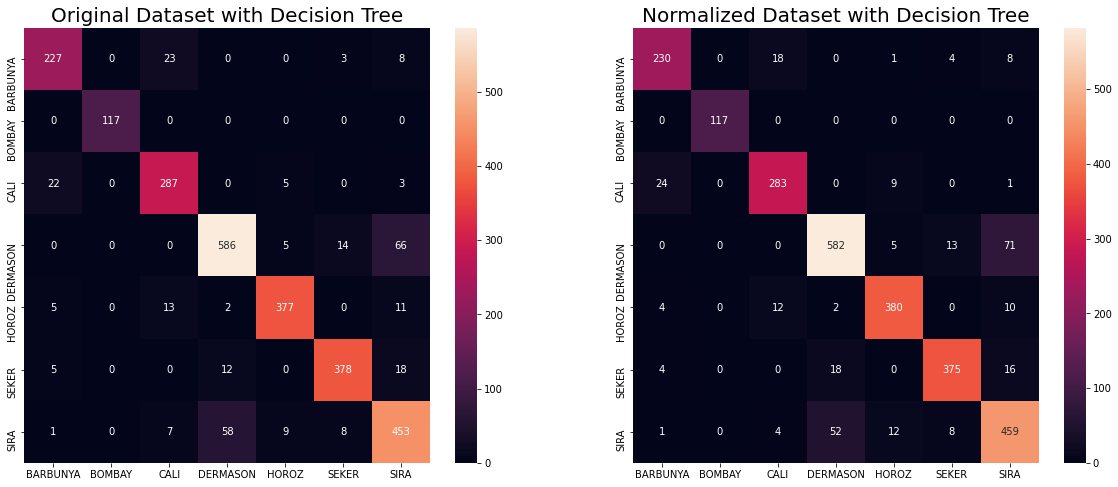

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

axes[0].set_title('Original Dataset with Decision Tree',fontsize=20)
cm3 = confusion_matrix(y_test, dt.predict(X_test))
sns.heatmap(cm3, annot=True, fmt='g', ax=axes[0])
axes[0].xaxis.set_ticklabels(class_names); axes[0].yaxis.set_ticklabels(class_names);

axes[1].set_title('Normalized Dataset with Decision Tree',fontsize=20)
cm4 = confusion_matrix(y_test, dt_normalized.predict(X_test_normalized))
sns.heatmap(cm4, annot=True, fmt='g', ax=axes[1])
axes[1].xaxis.set_ticklabels(class_names); axes[1].yaxis.set_ticklabels(class_names);

<h3> Naïve Bayes </h3>

In [35]:
nb = GaussianNB()
nb.fit(X_train,y_train)
print("Original dataset with Naïve Bayes\n")
print(classification_report(y_test, nb.predict(X_test))) 

Original dataset with Naïve Bayes

              precision    recall  f1-score   support

           0       0.42      0.43      0.42       261
           1       1.00      1.00      1.00       117
           2       0.64      0.64      0.64       317
           3       0.81      0.76      0.78       671
           4       0.66      0.62      0.64       408
           5       0.48      0.38      0.42       413
           6       0.58      0.74      0.65       536

    accuracy                           0.64      2723
   macro avg       0.66      0.65      0.65      2723
weighted avg       0.64      0.64      0.64      2723



In [36]:
nb_normalized = GaussianNB()
nb_normalized.fit(X_train_normalized,y_train)
print("Normalized dataset with Naïve Bayes\n")
print(classification_report(y_test, nb_normalized.predict(X_test_normalized)))

Normalized dataset with Naïve Bayes

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       261
           1       1.00      1.00      1.00       117
           2       0.86      0.91      0.88       317
           3       0.93      0.85      0.89       671
           4       0.96      0.96      0.96       408
           5       0.95      0.95      0.95       413
           6       0.82      0.90      0.86       536

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.90      0.90      0.90      2723



In [37]:
acc = accuracy_score(y_test, nb.predict(X_test))
original_dataset_accuracy.append(acc)
acc = accuracy_score(y_test, nb_normalized.predict(X_test_normalized))
normalized_dataset_accuracy.append(acc)

<h4> Confusion Matrix of Naïve Bayes </h4>

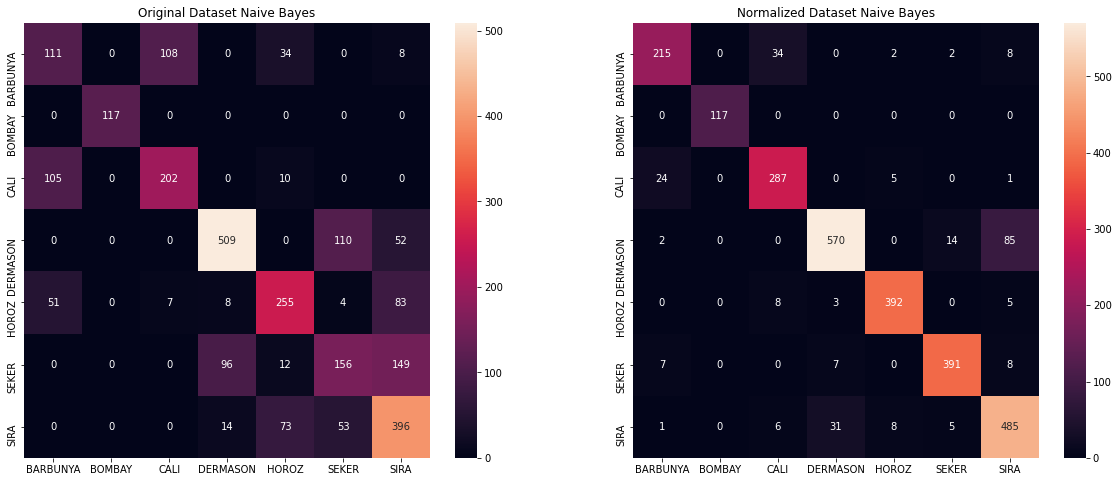

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

axes[0].set_title('Original Dataset Naive Bayes')
cm3 = confusion_matrix(y_test, nb.predict(X_test))
sns.heatmap(cm3, annot=True, fmt='g', ax=axes[0])
axes[0].xaxis.set_ticklabels(class_names); axes[0].yaxis.set_ticklabels(class_names);

axes[1].set_title('Normalized Dataset Naive Bayes')
cm4 = confusion_matrix(y_test, nb_normalized.predict(X_test_normalized))
sns.heatmap(cm4, annot=True, fmt='g', ax=axes[1])
axes[1].xaxis.set_ticklabels(class_names); axes[1].yaxis.set_ticklabels(class_names);

<h3> Conclusion </h3>

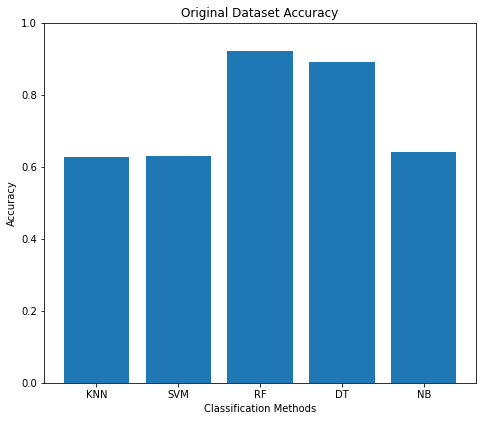

In [39]:
fig = plt.figure(figsize= (6,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Original Dataset Accuracy')

classification_methods = ['KNN', 'SVM', 'RF', 'DT', 'NB']
ax.bar(classification_methods, original_dataset_accuracy)
ax.set(ylim=[0, 1])
ax.set_xlabel("Classification Methods")
ax.set_ylabel("Accuracy")
plt.show()

In [40]:
print("Original Dataset Accuracies")
for j in range(len(original_dataset_accuracy)):
    print('{}: {:.3f}%'.format(classification_methods[j],original_dataset_accuracy[j]*100 ))

Original Dataset Accuracies
KNN: 62.835%
SVM: 63.055%
RF: 92.288%
DT: 89.056%
NB: 64.120%


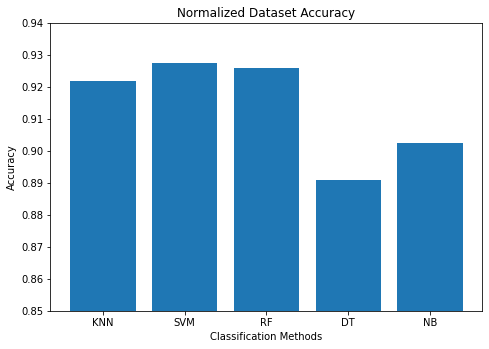

In [41]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Normalized Dataset Accuracy')
ax.bar(classification_methods, normalized_dataset_accuracy)
ax.set(ylim=[0.85, 0.94])
ax.set_xlabel("Classification Methods")
ax.set_ylabel("Accuracy")
plt.show()



In [42]:
print("Normalized Dataset Accuracies")
for j in range(len(original_dataset_accuracy)):
    print('{}: {:.3f}%'.format(classification_methods[j],normalized_dataset_accuracy[j]*100 ))

Normalized Dataset Accuracies
KNN: 92.178%
SVM: 92.729%
RF: 92.582%
DT: 89.093%
NB: 90.231%


- We achieved the highest accuracy in original data with the RandomForestClassifier method(92.288%). In other classification methods, the accuracy is between 60% and 90%. <br>

- When we applied the classification methods in normalized datasets, we obtained high accuracy in all of them. We achieved the highest accuracy in original data with the SVM method(92.655%). <br>
- These results clearly show the effect of normalizing the data on accuracies.
- It may be possible to reach higher accuracy in classification methods by using different feature selection methods.

## References<a class="anchor" id="references"></a>

[1] https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans <br>
[2] https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html <br>
[3] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html <br>
[4] https://scikit-learn.org/stable/modules/tree.html <br>
[5] https://scikit-learn.org/stable/modules/naive_bayes.html <br>
[6] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br>
[7] https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a <br>
[8] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html <br>
[9] https://github.com/ahmetalkilinc/DataScienceTutorials <br>
[10] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html <br>



**Disclaimer!** <font color='grey'>This notebook was prepared by Zafer Can YUCEL as an assigment for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>